Week 1 (Recap)
- Splitting
- Cross Validation
- Regression and Prediction

In [1]:
# Import important libralies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [3]:
# Import and read through the data, dont want index column
reg_data = pd.read_csv('Life_Exp_Data.csv', index_col= 0)
reg_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


array([[ 0.44987429,  0.03938534, -1.09827592, ...,  3.03360918,
        -0.77457357, -0.78097147],
       [-0.26706451, -0.00341293, -0.83000815, ...,  0.00449818,
         0.240526  , -0.0329945 ],
       [ 0.41765232, -0.26020256, -1.03120898, ..., -1.0500812 ,
        -2.93049606,  0.11084722],
       ...,
       [-0.76650503, -0.26020256,  0.50884671, ..., -0.93789191,
         1.42791312,  1.54926447],
       [-0.13012115, -0.26020256, -0.79633668, ...,  0.43081751,
         0.69685517,  0.91636088],
       [ 0.65126159,  0.270496  , -0.71077804, ...,  0.75741301,
        -0.78388641, -1.44264341]])

<Figure size 1000x600 with 0 Axes>

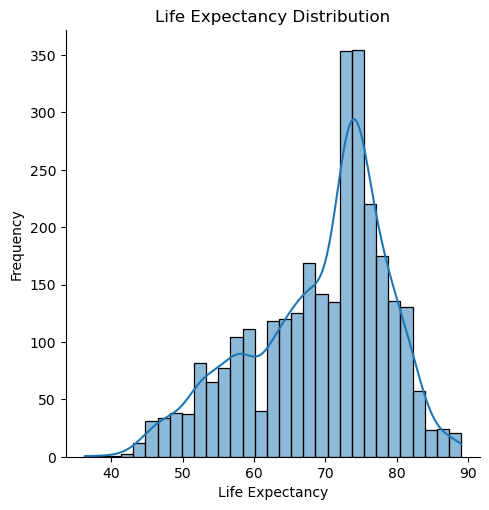

In [5]:
# Separate the resp and the preds
y = reg_data['Life expectancy '] # Response => that's how to access the column
x = reg_data.drop(['Life expectancy '], axis=1) # Predictors

# Look at y distribution
plt.figure(figsize=(10, 6))
sns.displot(y, kde = True)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

# Split the data into training and testing 80/20), set the randomstate from duplication
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 45)

# Scale the data (Normalize) => Decrease the influence of each data on other
scaler = StandardScaler()
# Train the scaler with the training data and scale the training data
scaler.fit(x_train)
# Transform the train and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Creste the model
linreg = LinearRegression()

# Train the model (Fitting the model, not using even fold or cross validation)
linreg.fit(x_train_scaled, y_train) # Using scaled data

# Predict the model by fitting the model with testing data
y_pred = linreg.predict(x_test_scaled)

# optimal coefficients
linreg.coef_ #W1 to Wn

#Intercept
linreg.intercept_ #W0   

In [ ]:
# Evaluate the model performance
mse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse, mae

In [ ]:
# Try with ridge model
ridge = Ridge(alpha=10) # Hyperparams come as inputs when the model object is created
lasso = Lasso(alpha=10)
ridge.fit(x_train_scaled, y_train)
ridge.coef_

Classification

In [ ]:
# Read data from the datatable
cl_data = pd.read_csv('diabetes.csv', index_col= 0)
cl_data.head()  

In [47]:
# Split the train and test data
y = cl_data['Outcome']
x = cl_data.drop(['Outcome'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 45)

# Scale the data
scaler = StandardScaler()
scaler.fit(x_train) # "Train" the scaler with the training data
x_train_scaled = scaler.transform(x_train) # Scale the train data
x_test_scaled = scaler.transform(x_test) # Scale the test data



In [ ]:
# Use Logistic Regression for classification
# Equivalent to create spec, workflow, hyperparams setup in R
logreg = LogisticRegression(penalty= None) # Penalty = None for unreg. Log. Reg.

logreg.fit(x_train_scaled, y_train) # Train the model

y_pred = logreg.predict(x_test_scaled) # Predict the model, 0.5 is a default threshold
print(y_pred)
print(y_test)
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
y_pred_probs = logreg.predict_proba(x_test_scaled) # Getting the pred. prob.s instead
print(y_pred_probs)


# Using 0.3 as threshold
y_pred2 = y_pred_probs[:,1] > 0.3
print(y_pred2)

# Using 0.7 as threshold
y_pred3 = y_pred_probs[:,1] > 0.7
print(y_pred3)
# Try the metrics with y_pred2 and y_pred3
print(confusion_matrix(y_test, y_pred2))

*** Week 2 (Gradient Descent Regression)

Linear Regression
-  y = $w_{0}$ + $w_{1}x_{1}$ + $w_{2}x_{2}$ + ... + $w_{N}x_{N}$

where
- $x_{1}, x_{2}, x_{3},...,x_{N}$ are predictors
- $w_{0}, w_{1}, w_{2},...,w_{N}$ are the parameters

Training model = finding optimal parameters denoted as $\hat{w_{0}}, \hat{w_{1}}, ..., \hat{w_{n}}$

Linear Regression - Cost Function
How do we find the optimal parameters?
- Start by calculating a cost function.
- The cost function should be in terms of the data (𝑥 and 𝑦)
and the parameters (𝑤’s)
- For Linear Regression, the cost function is called the Mean
Squared Error (MSE) cost.

Assume that we have data with M observations
- For the $i^{th}$ observation, we have:
    - A true response (y)
    - A predicted response ($\hat{y}$)
    - The error made by $i^{th}$ observation is $e_{i}$ = $y - \hat{y}$
- To find MSE cost of the regression model, find all es 
- Take the square of all errors
- Takes the average

Finally we have MSE = $\frac{1}{M}\sum_{i=1}^M (e_{i})^{2}$
                    = $\frac{1}{M}\sum_{i=1}^M (y_{i} - \hat{y_{i}})^{2}$
                    = $\frac{1}{M}\sum_{i=1}^M (y_{i} - \hat{w_{0}} - \hat{w_{1}}x_{1} - \hat{w_{2}}x_{2} - ... - \hat{w_{N}}x_{N})^{2}$


A much shorter way can be written through the vector w containing all $w_{i}$ and $x^{(i)}$ of observations.

Then MSE = $\frac{1}{M}\sum_{i=1}^M (y_{i} - w^{T}x^i)^{2}$

So training linear regression means 
- optimizing parameters to achieve the lowest MSE

How do we minimize MSE?
- Write the data and the parameters in a matrix-vector equation (X𝐰 = 𝐲) and solve for 𝐰.
    - This returns a closed form (algebraic) solution for the optimal parameters.
    - Only possible for Linear Regression and not useful for big data – not covered in this class
- Start with random values and iteratively converge to the optimum 𝐰 by taking gradients.
    - This is called Gradient Descent: A numeric method to optimize a function.
        - Numeric methods find “close enough” solutions instead of algebraic ones.
    - Applicable to any cost function (This will be very useful for Logistic Regression and Neural
    Networks.)
    - Very efficient with big data

Gradient Descent - Algorithm for training a model
To start with, note that:
• The 𝒙(𝑖)s and 𝑦 𝑖 s are the data that we have – they are constant values.
• The 𝒘 vector has the only variables of the MSE cost function.
So, we can express the function as:

Then MSE = $\frac{1}{M}\sum_{i=1}^M (y_{i} - w^{T}x^{i})^{2}$



In [ ]:
# This part is missing (6 slides)

#### Derive MSE
MSE =  $\frac{1}{M}\sum_{i=1}^M (y_{i} - w^{T}x^i)^{2}$

We will find $\frac{\partial MSE}{\partial w_{j}}$.

For j = 0, $w_{0}$:

$\frac{\partial MSE}{\partial w_{j}}$ = -$\frac{2}{M}\sum_{i=1}^{M}(y_{i} - w^{T}x^i)$

For j = 1,2,3,...,N, $w_{1}, w_{2},...,w_{N}$:

$\frac{\partial MSE}{\partial w_{j}}$ = -$\frac{2}{M}\sum_{i=1}^{M}(y_{i} - w^{T}x^i)(x_j^i)$

Then $\triangledown MSE$ = 


**More on Gradient Descent**

Ridge Regression
- A Linear Model Regression can be turned to Ridge model by adding penalty term (Square of paramemeters)

    $Ridge Cost$ = $\frac{1}{M}\sum_{i=1}^M (y_{i} - w^{T}x^i)^{2}$ + $\lambda||w||_{2}^2$

- Added $||w||^2$ term is called the ridge penalty term
- The penalty term is multiplied with a value that determines the magnitude of penalty
- Avoid overfitting
- The ridge cost can be minimized algebraically and gradient descent way

Lasso Regression
- Another **regularized version** for linear regression

    $Lasso Cost$ = $\frac{1}{M}\sum_{i=1}^M (y_{i} - w^{T}x^i)^{2}$ + $\lambda||w||_{1}$
- Just like ridge, adding $||w||$ to the MSE cost
- Lasso does not have an obvious advantage on Ridge (Just different method of regularization)
- The only **extra usage of Lasso** is that takes some parameter valuyes (of the trained model) to zero, so it       implements feature selection.
- Gradient descent cannot be directly applied to Lasso Cost (HW 1)
- Extensions of model: Subgradient


**Elastic Net**
- Adding both L2 and L1 penalties to the MSE cost.
- The model is called elastic net regression

    $ElasticNet Cost$ = $\frac{1}{M}\sum_{i=1}^M (y_{i} - w^{T}x^i)^{2}$ + $\lambda_{1}||w||_{1}$ + $\lambda_{2}||w||_{2}^2$
- Elastic Net is at least as good as Lasso/Ridge 
- Gradient Descent cannot be directly applied
- Algebraic regression is also an option


**Logistic Regression**

Remember the formula of a logistic regression model

$Pr(y = 1| x) = \sigma(w^T x)$

In this formula:
- $𝑦_𝑖$ s are 0s and 1s.
- There is a sigmoid function involved.
- This is not a convex function anymore!
- It cannot be solved algebraically and Gradient Descent will be **very inefficient**.


$\sigma$ denotes sigmoid function.

$MSE (w) = \frac{1}{M}\sum_{i=1}^M(y^i-\sigma(w^T x^i))^2$

- The shape of regression is not conves and does not look good

- We need another cost function for this logistic regression

- The proper cost function should be binary cross-entropy (BCE)

$BCE = -\frac{1}{M}\sum_{i = 1}^M y^i \log(\sigma(w^T x^i)) + (1 - y^i)\log(1 - \sigma(w^T x^i))$

Note that in this function:
- $𝑦^(𝑖)s$ are the true responses
- $\sigma(𝒘^𝑇 𝒙^𝑖)$ s are the model outputs.
- The model outputs are always between 0 and 1.



**Derivation of Sigmoid Function**

$\sigma(x) = \frac{1}{1 + e^{-x}}$

Derivative of $\sigma(x)$  = $(1 + e^{-x})^{-2} e^{-x}$

Then we have $\sigma'(x)$ = $\sigma(x)(1 - \sigma(x))$

$\frac{dlogf(x)}{dx} = \frac{f'(x)}{f(x)}$



Final Note on Logistyic Regression
- For multi-class classification, the binary cross-entropy

**Scaling for Gradient Descent**
- Why is scaling important for linear or logistic regression?: The distorted magnitude leads to

The most famous parametric models are usually:
- Linear/Logistic Regression, because of their interpretability.
- Neural Networks, because of their predictive power.
- Linear/Logistic Regression is trained with Gradient Descent.
- Neural Networks are trained with backpropagation, which is based on the
idea of Gradient Descent.
There is, however, another parametric model that is:
- Applicable to both regression and classification.
- Trained in an entirely different way.
- Famous for an entirely different reason, called “large margin”.
Before

SVM – Motivation

From a Logistic Regression perspective, is there any
difference between the possible lines that classify
the data perfectly?
- No! As long as the cost function is minimized,
the Gradient Descent algorithm will converge to
one of the lines.
- Then it will stop.
- Depending on the initialization, learning rate,
etc., it can converge to any line that classifies the
data perfectly.
- In other words, Logistic Regression does not
care about the line with the largest distance to
both classes; it just finds one of the best
possible lines.


In [ ]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR


#### Note on SVMs

In [ ]:
# Training and evaluation are like any other sklearn model

# Linear kernel is also the default - means linear SVM
# For linear.SVM, C is the only hyperparam (C = 1/ lambda)

# Non-linear kernalized version of SVM have either rbf or poly
# Also has C as a first hyperparameters
# For rbf, there is gamma
# For poly, there is degree

SVC(kernel = 'linear', C = 0.1)
SVC(kernel = 'rbf', C = 0.1, gamma = ...)
SVC(kernel = 'poly', C = 0.1, gamma = ...)

#### Note on Cross Validation

In [ ]:
# To tune any model, you need to use searchCV object

# Create the model (Excluding hyperparams that you want to tune)

en = ElasticNet(random_state=2)
